In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#get the urlopen function from the urllibrary
from urllib.request import urlopen

In [2]:
# URL for post-operative.data (UCI Machine Learning Repository)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
"""
Attribute Information:
     1. L-CORE (patient's internal temperature in C):
           high (> 37), mid (>= 36 and <= 37), low (< 36)
     2. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
     3. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
     4. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
     5. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
     6. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
     7. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
     8. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
     9. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)
"""

names = ['coreTemp','surfTemp', 'O2', 'bloodPress', 'surfTempStab', 'coreTempStab', 'bloodPressStab', 'comfort', 'decision']
df = pd.read_csv(url, names = names,na_values="?")

df.head(5)


,coreTemp,surfTemp,O2,bloodPress,surfTempStab,coreTempStab,bloodPressStab,comfort,decision
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A


PREPROCESSING: The patient's perceived comfort had three instances of "?". So I replaced those with NaNs in the above import

In [3]:
print(df.shape)

(90, 9)


# Histogram of perceived comfort
The histogram below shows the disparity of distribution in the reported perceived comfort level of the patients.

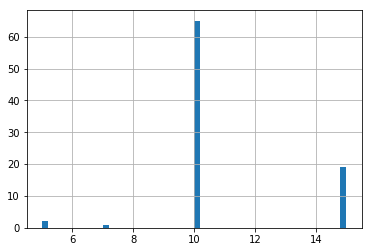

In [4]:
df['comfort'].hist(bins=50)

# Comfort level looked at as a function of core and surface tempature:
The plots below showed that a high core and surface temperature levels were the only ones that didn't have outliers. However, all the medians were 10 and both the low and mid tempatures had lots of outliers. 

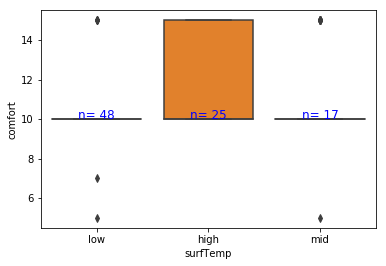

In [5]:
import seaborn as sns
ax = sns.boxplot(x="surfTemp", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['surfTemp'])['comfort'].median().values
nobs = df['surfTemp'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')


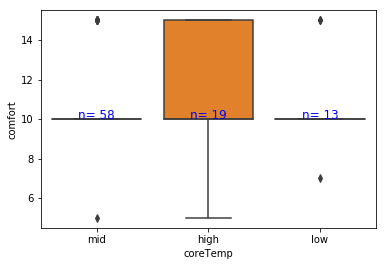

In [6]:
ax = sns.boxplot(x="coreTemp", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['coreTemp'])['comfort'].median().values
nobs = df['coreTemp'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')

# Comfort level looked at as a function of O2 Saturation:
The plot below showed that a good and excellent O2 Saturation had the same median comfort level. The excellent O2 saturation involved outliers. However, there appear to be no general trends observable with respect to O2 saturation and perceived comfort levels.

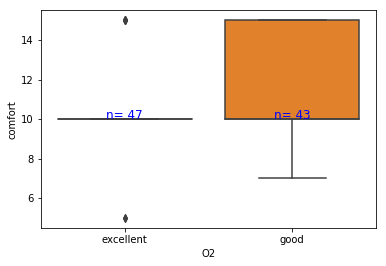

In [7]:
ax = sns.boxplot(x="O2", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['O2'])['comfort'].median().values
nobs = df['O2'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')

# Comfort level looked at as a function of blood pressure:
Once again the plot below shows that all the blood pressure levels had the same median in perceived comfort level. The mid and high blood pressure also had outliers. There appears to be no observable trend. 

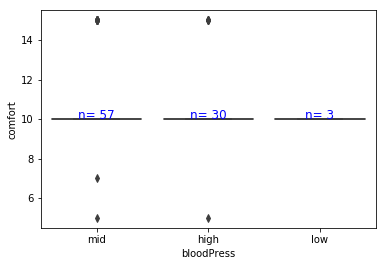

In [8]:
ax = sns.boxplot(x="bloodPress", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['bloodPress'])['comfort'].median().values
nobs = df['bloodPress'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')

# Comfort level looked at as a function of the stability of surface temperature, core temperature, and blood pressure:
The plots below showed that there was no difference in median, but that the unstable surface temperature, core temperature, and blood pressure had more variance.

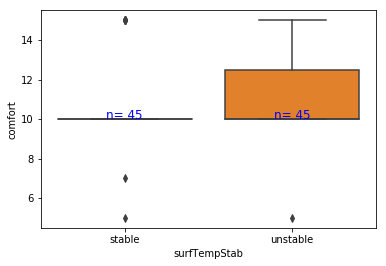

In [9]:
ax = sns.boxplot(x="surfTempStab", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['surfTempStab'])['comfort'].median().values
nobs = df['surfTempStab'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')

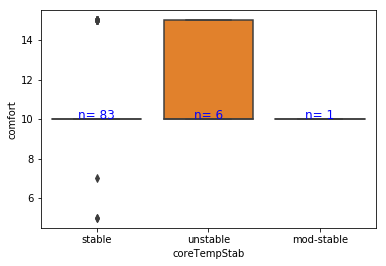

In [10]:
ax = sns.boxplot(x="coreTempStab", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['coreTempStab'])['comfort'].median().values
nobs = df['coreTempStab'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')

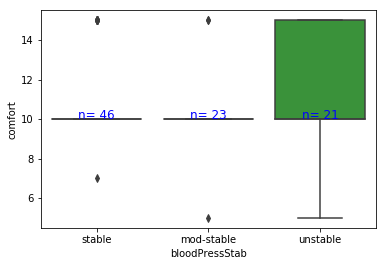

In [11]:
ax = sns.boxplot(x="bloodPressStab", y="comfort", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['bloodPressStab'])['comfort'].median().values
nobs = df['bloodPressStab'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],horizontalalignment='center', size='large', color='b')

In [12]:
np.mean(df.comfort)

10.942528735632184

PREPROCESSING: Since we were looking at the effect of the categorical features effect on perceived comfort, I decided to remove all the row with NaN. 

In [13]:
df = df.dropna(axis=0, how='any')

In [14]:
df

,coreTemp,surfTemp,O2,bloodPress,surfTempStab,coreTempStab,bloodPressStab,comfort,decision
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A
5,high,low,good,mid,stable,stable,unstable,15.0,S
6,mid,low,excellent,high,stable,stable,mod-stable,5.0,S
7,high,mid,excellent,mid,unstable,unstable,stable,10.0,S
8,mid,high,good,mid,stable,stable,stable,10.0,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10.0,S


In [15]:
df['coreTemp'].value_counts()

mid     57
low     18
high    12
Name: coreTemp, dtype: int64

PREPROCESSING: Changed the core tempeerature to an ordinal feature from 1 to 3.

In [16]:
coreTemp_mapping = {'high': 3,'mid': 2,'low': 1}
df['coreTemp'] = df['coreTemp'].map(coreTemp_mapping);

PREPROCESSING: Changed the surface temperature to an ordinal feature from 1 to 3. 

In [17]:
surfTemp_mapping = {'high': 3,'mid': 2,'low': 1}
df['surfTemp'] = df['surfTemp'].map(surfTemp_mapping);

In [18]:
df['O2'].value_counts()

good         46
excellent    41
Name: O2, dtype: int64

PREPROCESSING: Changed the O2 saturation to ordinal feature from 1 to 2. 

In [19]:
O2_mapping = {'excellent': 2,'good': 1}
df['O2'] = df['O2'].map(O2_mapping);

In [20]:
df['bloodPress'].value_counts()

mid     56
high    28
low      3
Name: bloodPress, dtype: int64

PREPROCESSING: Changed the blood pressure to an ordinal feature from 1 to 3. 

In [21]:
bloodPress_mapping = {'high': 3, 'mid': 2,'low': 1}
df['bloodPress'] = df['bloodPress'].map(bloodPress_mapping);

In [22]:
df['surfTempStab'].value_counts()

stable      44
unstable    43
Name: surfTempStab, dtype: int64

PREPROCESSING: Changed the surface temperature stability to a class label of 1 = stable and 0 = unstable


In [23]:
surfTempStab_mapping = {'stable': 1, 'unstable': 0}
df['surfTempStab'] = df['surfTempStab'].map(surfTempStab_mapping);

In [24]:
df['coreTempStab'].value_counts()

stable        81
unstable       5
mod-stable     1
Name: coreTempStab, dtype: int64

PREPROCESSING: Changed the core temperature stability to an ordinal feature ranging from 1 to 3. 

In [25]:
coreTempStab_mapping = {'stable': 3, 'mod-stable': 2, 'unstable': 1}
df['coreTempStab'] = df['coreTempStab'].map(coreTempStab_mapping);

In [26]:
df['bloodPressStab'].value_counts()

stable        45
unstable      21
mod-stable    21
Name: bloodPressStab, dtype: int64

PREPROCESSING: Changed the blood pressure stability to an ordinal feature ranging from 1 to 3. 

In [27]:
bloodPressStab_mapping = {'stable': 3, 'mod-stable': 2, 'unstable': 1}
df['bloodPressStab'] = df['bloodPressStab'].map(bloodPressStab_mapping);

In [28]:
df['comfort'].value_counts()

10.0    65
15.0    19
5.0      2
7.0      1
Name: comfort, dtype: int64

Don't need to do a preprocessing step on the comfort level because it is already an integer. 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 89
Data columns (total 9 columns):
coreTemp          87 non-null int64
surfTemp          87 non-null int64
O2                87 non-null int64
bloodPress        87 non-null int64
surfTempStab      87 non-null int64
coreTempStab      87 non-null int64
bloodPressStab    87 non-null int64
comfort           87 non-null float64
decision          87 non-null object
dtypes: float64(1), int64(7), object(1)
memory usage: 6.8+ KB
